In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
abalone = pd.read_csv('abalone.csv', sep =',')

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


# EDA

In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   int64  
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [5]:
abalone.shape

(4176, 9)

In [6]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
abalone.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4171    False
4172    False
4173    False
4174    False
4175    False
Length: 4176, dtype: bool

<Axes: >

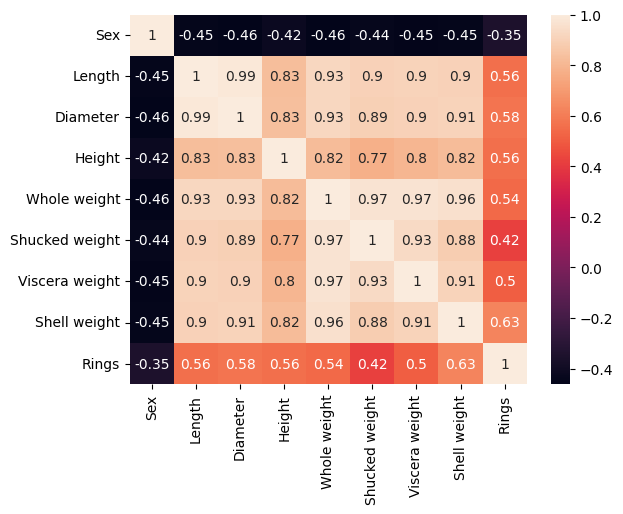

In [8]:
sns.heatmap(abalone.corr(),annot=True,)

In [9]:
abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.955699,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.827782,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


# Preprocessing

In [10]:
features = abalone[['Length', 'Diameter', 'Height', 
       'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]

In [11]:
features = features.to_numpy()

In [12]:
target = abalone['Rings'].to_numpy() 

In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler()

In [15]:
features = scaler.fit_transform(features)

In [16]:
features

array([[-1.44900723, -1.43989229, -1.18425209, ..., -1.17096695,
        -1.20532696, -1.21305408],
       [ 0.0498915 ,  0.12201495, -0.10824748, ..., -0.46361041,
        -0.35684354, -0.20727719],
       [-0.69955786, -0.4322102 , -0.34735962, ..., -0.64833409,
        -0.60773918, -0.60240383],
       ...,
       [ 0.63279657,  0.67624011,  1.56553747, ...,  0.74835715,
         0.97518418,  0.49676663],
       [ 0.84097695,  0.77700832,  0.25042072, ...,  0.77313716,
         0.73341202,  0.41055718],
       [ 1.54879024,  1.48238578,  1.32642533, ...,  2.64064851,
         1.78717368,  1.84019719]])

<Axes: xlabel='Rings', ylabel='count'>

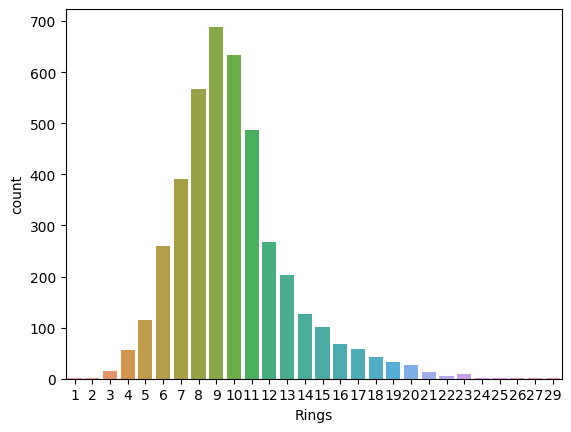

In [17]:
sns.countplot(data = abalone, x = 'Rings')

# Model training

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3340, 7), (3340,), (836, 7), (836,))

In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [22]:
model = KNN()

In [23]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_pred)

0.215311004784689

In [27]:
k_values = list(range(1,20))
accuracy_list = []

In [28]:
for k in k_values:
    m = KNN(n_neighbors=k)     
    m.fit(X_train, y_train)    
    y_pred = m.predict(X_test)  
    accuracy_list.append(accuracy_score(y_test, y_pred))

<Axes: >

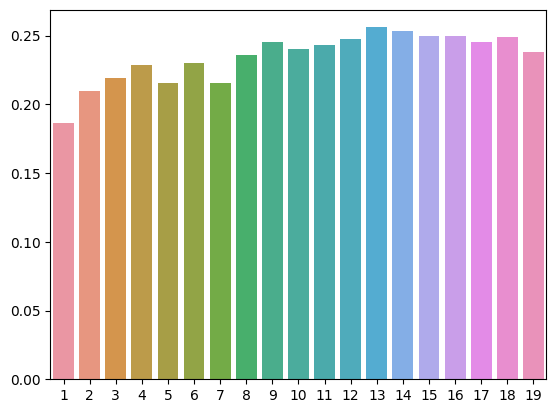

In [29]:
sns.barplot(data = { 'k_values': k_values, 'accuracy': accuracy_list }, x = 'k_values', y = 'accuracy')

In [30]:
model = KNN(n_neighbors = 5)

In [31]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.215311004784689

# Hyperparameter tuning with Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
clf = GridSearchCV(
    LogisticRegression(), 
    param_grid = params, 
    scoring='accuracy',   
    cv=5,                 
)

In [39]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [40]:
clf.best_score_

0.2880239520958084

In [41]:
clf.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [42]:
logreg = LogisticRegression(C=1, solver='newton-cg')

In [43]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

In [44]:
y_pred = logreg.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.2715311004784689